# Excercises Chapter 6.5  Hantush, a well in a semi-confined aquifer



### Hantush type curves

1. Implement the Hantush well function
2. Plot the Hantush type curves for different values of r/L
3. add the Theis type curve

In [30]:
import numpy as np
from scipy.special import expi
import matplotlib.pyplot as plt

def W(u): return -expi(-u)
def Wh(U, rho):
    """Hantush's well function"""
    w = np.zeros(len(U))
    for i, u in enumerate(U):
        y = np.logspace(np.log10(u), 2., 800)
        arg = np.exp(-y - (rho/2)**2/y) / y
        dy = np.diff(y)
        w[i] = np.sum (0.5 * (arg[:-1] * dy + arg[1:] * dy))
    return w

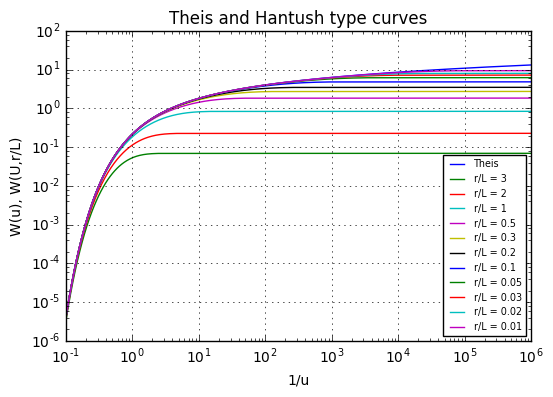

In [31]:
ax = plt.figure().add_subplot(111)
ax.set(xlabel='1/u', ylabel='W(u), W(U,r/L)',  title='Theis and Hantush type curves',
      xscale='log', yscale='log')
ax.grid(True)

rho = np.array([3, 2, 1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.03, 0.02, 0.01])

u = np.logspace(-6, 1, 601)
ax.plot(1/u, W(u), label='Theis')

for rh in rho:
    ax.plot(1/u, Wh(u, rh), label='r/L = {:g}'.format(rh))
    ax.legend(loc='best', fontsize='x-small')
plt.show()

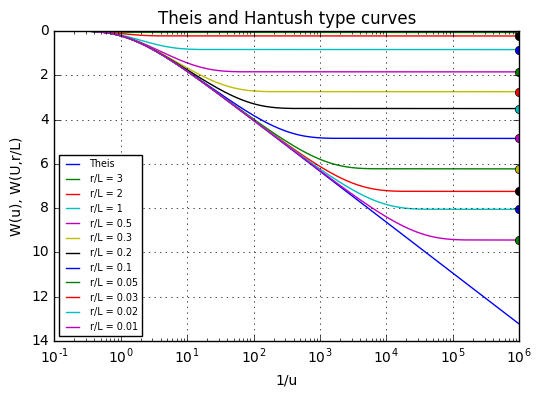

In [38]:
from scipy.special import k0
ax = plt.figure().add_subplot(111)
ax.set(xlabel='1/u', ylabel='W(u), W(U,r/L)',  title='Theis and Hantush type curves',
      xscale='log', yscale='linear')
ax.grid(True)
ax.invert_yaxis()

rho = np.array([3, 2, 1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.03, 0.02, 0.01])

u = np.logspace(-6, 1, 601)
ax.plot(1/u, W(u), label='Theis')

for rh in rho:
    ax.plot(1/u, Wh(u, rh), label='r/L = {:g}'.format(rh))
    ax.legend(loc='best', fontsize='x-small')

ue = (1/u[0])
for rh in rho:
    ax.plot(ue, 2.0 * k0(rh), 'o')

plt.show()


1. Consider an aquifer with constant transmissivity, $kD=900$ m2/d an $S=0.001$ with $c=400$ d. For a observation point at r=600 m, determinewhen the drawdonw has becomesteady state (to at least 95%). Use the Hantush type cuves to determine your answer.

#### Exercise p110.14

The head below a building pit of 50 x 50 m in a semi-confined aquifer with kD=1000 m2/d, c=360 d and S=0.002, has to be lowered by 3.5 m. The wells are placed at the corners of the building pit. How long one needs to pump to reach steady state drawdown and what is the final drawdown in the center of the building pit. Show both the transient drawdown and the steady state drawdown.

### Pumping test in a semi-confined aquifer

Q = 760 # m3/d, pump extraction

In [55]:
#              r [m]            t[d]             dd[m]
data = np.array(
      [[  3.00000000e+01,   1.53000000e-02,   1.38000000e-01],
       [  3.00000000e+01,   1.81000000e-02,   1.41000000e-01],
       [  3.00000000e+01,   2.29000000e-02,   1.50000000e-01],
       [  3.00000000e+01,   2.92000000e-02,   1.56000000e-01],
       [  3.00000000e+01,   3.61000000e-02,   1.63000000e-01],
       [  3.00000000e+01,   4.58000000e-02,   1.71000000e-01],
       [  3.00000000e+01,   6.60000000e-02,   1.80000000e-01],
       [  3.00000000e+01,   8.68000000e-02,   1.90000000e-01],
       [  3.00000000e+01,   1.25000000e-01,   2.01000000e-01],
       [  3.00000000e+01,   1.67000000e-01,   2.10000000e-01],
       [  3.00000000e+01,   2.08000000e-01,   2.17000000e-01],
       [  3.00000000e+01,   2.50000000e-01,   2.20000000e-01],
       [  3.00000000e+01,   2.92000000e-01,   2.24000000e-01],
       [  3.00000000e+01,   3.33000000e-01,   2.28000000e-01],
       [  6.00000000e+01,   1.88000000e-02,   8.10000000e-02],
       [  6.00000000e+01,   2.36000000e-02,   8.90000000e-02],
       [  6.00000000e+01,   2.99000000e-02,   9.40000000e-02],
       [  6.00000000e+01,   3.68000000e-02,   1.01000000e-01],
       [  6.00000000e+01,   4.72000000e-02,   1.09000000e-01],
       [  6.00000000e+01,   6.67000000e-02,   1.20000000e-01],
       [  6.00000000e+01,   8.82000000e-02,   1.27000000e-01],
       [  6.00000000e+01,   1.25000000e-01,   1.37000000e-01],
       [  6.00000000e+01,   1.67000000e-01,   1.48000000e-01],
       [  6.00000000e+01,   2.08000000e-01,   1.55000000e-01],
       [  6.00000000e+01,   2.50000000e-01,   1.58000000e-01],
       [  6.00000000e+01,   2.92000000e-01,   1.60000000e-01],
       [  6.00000000e+01,   3.33000000e-01,   1.64000000e-01],
       [  9.00000000e+01,   2.43000000e-02,   6.90000000e-02],
       [  9.00000000e+01,   3.06000000e-02,   7.70000000e-02],
       [  9.00000000e+01,   3.75000000e-02,   8.30000000e-02],
       [  9.00000000e+01,   4.68000000e-02,   9.10000000e-02],
       [  9.00000000e+01,   6.74000000e-02,   1.00000000e-01],
       [  9.00000000e+01,   8.96000000e-02,   1.09000000e-01],
       [  9.00000000e+01,   1.25000000e-01,   1.20000000e-01],
       [  9.00000000e+01,   1.67000000e-01,   1.29000000e-01],
       [  9.00000000e+01,   2.08000000e-01,   1.36000000e-01],
       [  9.00000000e+01,   2.50000000e-01,   1.41000000e-01],
       [  9.00000000e+01,   2.92000000e-01,   1.42000000e-01],
       [  9.00000000e+01,   3.33000000e-01,   1.43000000e-01],
       [  1.20000000e+02,   2.50000000e-02,   5.70000000e-02],
       [  1.20000000e+02,   3.13000000e-02,   6.30000000e-02],
       [  1.20000000e+02,   3.82000000e-02,   6.80000000e-02],
       [  1.20000000e+02,   5.00000000e-02,   7.50000000e-02],
       [  1.20000000e+02,   6.81000000e-02,   8.60000000e-02],
       [  1.20000000e+02,   9.03000000e-02,   9.20000000e-02],
       [  1.20000000e+02,   1.25000000e-01,   1.05000000e-01],
       [  1.20000000e+02,   1.67000000e-01,   1.13000000e-01],
       [  1.20000000e+02,   2.08000000e-01,   1.22000000e-01],
       [  1.20000000e+02,   2.50000000e-01,   1.25000000e-01],
       [  1.20000000e+02,   2.92000000e-01,   1.27000000e-01],
       [  1.20000000e+02,   3.33000000e-01,   1.29000000e-01]])

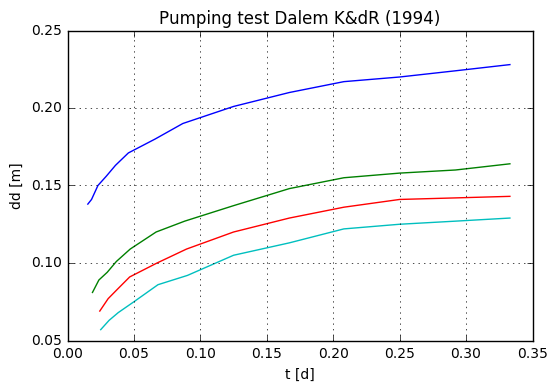

In [67]:
ax= plt.figure().add_subplot(111)
ax.set(xlabel='t [d]', ylabel='dd [m]', title='Pumping test Dalem K&dR (1994)')
ax.grid(True)
for r in [30, 60, 90, 120]:
    plt.plot( data[data[:,0]==r,1], data[data[:,0]==r, 2], label='r='+str(r)+'m')
plt.show()

Work out this pumping test in double-log graphic

+ plot the Hantush-Theis type curves like before.
+ Add the plot of the dawdown vs $t/r^2$
+ Write the drawdown data a as $s = A\, W_h(B \, t/r^2)$
    that is: muliply the dd by $A$ and $t/r^2$ by $B$
+ experiment with $A$ and $B$ until the best possible fit between the data and the type curves is obtained.
+ when done determine $kD$ and $S$ from $A$ and $B$
+ determine L from the r/L of the best matching curve for each piezometer

Work out this pumping test in semi-log graphic

+ Plot the drawdown on semi-log scale versus $t/r^2$
+ From the straight portion of the drawdown curve determine kD
+ From the intercept of the straight line with 0 determine S
+ From the final steady-state drawdown determine r/L
+ Compare the results with those obtained from the double log analysis

In the digital syllabus is an example of a pumping test analysis with delayed yield. See if you understand the approach by which it was analyzed.